# Proyek Analisis Data: Nama dataset
- Nama: Yusup Ibrahim Nursiddiq
- Email: yusupibrahim0118@gmail.com
- Id Dicoding:81313297043

## Menentukan Pertanyaan Bisnis

- pada faktor atau kondisi apa seluruh jumlah peserta pesepeda paling banyak permusim?
- pada faktor atau kondisi apa pemain dengan jumlah peserta casual paling banyak permusim?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
dayBike_df = pd.read_csv("day.csv", delimiter=",")
dayBike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hourBike_df = pd.read_csv("hour.csv", delimiter=",")
hourBike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
dayBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil diatas bisa dilihat bawasannya column dteday yang dimana itu sebuah datetime memiliki Dtype object hal tersebut tidak benar

In [5]:
dayBike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
dayBike_df.duplicated().sum()

0

In [7]:
hourBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil diatas bisa dilihat bawasannya column dteday yang dimana itu sebuah datetime memiliki Dtype object hal tersebut tidak benar

In [8]:
hourBike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hourBike_df.duplicated().sum()

0

Hasil dari Assessing data didapat sebuah kolom yang tidak sesuai tipe datanya

### Cleaning Data

In [11]:
dayBike_df[dayBike_df.cnt != dayBike_df.casual + dayBike_df.registered]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [12]:
hourBike_df[hourBike_df.cnt != hourBike_df.casual + hourBike_df.registered]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Kode diatas mengecek apakah hasil perhitungan total pesededa sudah benar atau tidak. Didapat hasil bawasannya hasil perhitungan sudah benar.

In [15]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
    dayBike_df[column] = pd.to_datetime(dayBike_df[column])
    hourBike_df[column] = pd.to_datetime(hourBike_df[column])

Kode diatas mengubah tipe data kolom yang salah yaitu dteday lalu mengubahnya menjadi datetime.

In [16]:
dayBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hourBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [9]:
dayBike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
hourBike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
dayBike_df.describe(include="all")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19948\2504628170.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dayBike_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [11]:

sort_df = dayBike_df.sort_values(['cnt'],ascending=False).groupby("season").head()

In [12]:
print(sort_df)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
623      624 2012-09-15       3   1     9        0        6           0   
637      638 2012-09-29       4   1     9        0        6           0   
630      631 2012-09-22       3   1     9        0        6           0   
447      448 2012-03-23       2   1     3        0        5           1   
504      505 2012-05-19       2   1     5        0        6           0   
617      618 2012-09-09       3   1     9        0        0           0   
571      572 2012-07-25       3   1     7        0        3           1   
629      630 2012-09-21       3   1     9        0        5           1   
643      644 2012-10-05       4   1    10        0        5           1   
518      519 2012-06-02       2   1     6        0        6           0   
658      659 2012-10-20       4   1    10        0        6           0   
644      645 2012-10-06       4   1    10        0        6           0   
631      632 2012-09-23  

In [13]:
sort_df = dayBike_df.sort_values(['casual'],ascending=False).groupby("season").head()

In [14]:
print(sort_df)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
504      505 2012-05-19       2   1     5        0        6           0   
512      513 2012-05-27       2   1     5        0        0           0   
462      463 2012-04-07       2   1     4        0        6           0   
623      624 2012-09-15       3   1     9        0        6           0   
441      442 2012-03-17       1   1     3        0        6           0   
184      185 2011-07-04       3   0     7        1        1           0   
644      645 2012-10-06       4   1    10        0        6           0   
532      533 2012-06-16       2   1     6        0        6           0   
511      512 2012-05-26       2   1     5        0        6           0   
595      596 2012-08-18       3   1     8        0        6           0   
658      659 2012-10-20       4   1    10        0        6           0   
539      540 2012-06-23       3   1     6        0        6           0   
665      666 2012-10-27  

In [20]:
hourBike_df.describe(include="all")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13316\3066962371.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hourBike_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [21]:

sort_df = hourBike_df.sort_values(['cnt'],ascending=False).groupby("season").head()

In [22]:
print(sort_df)

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
14773    14774 2012-09-12       3   1     9  18        0        3           1   
14964    14965 2012-09-20       3   1     9  17        0        4           1   
14748    14749 2012-09-11       3   1     9  17        0        2           1   
14725    14726 2012-09-10       3   1     9  18        0        1           1   
15084    15085 2012-09-25       4   1     9  17        0        2           1   
15780    15781 2012-10-24       4   1    10  17        0        3           1   
10622    10623 2012-03-23       2   1     3  17        0        5           1   
15108    15109 2012-09-26       4   1     9  17        0        3           1   
15444    15445 2012-10-10       4   1    10  17        0        3           1   
15588    15589 2012-10-16       4   1    10  17        0        2           1   
14293    14294 2012-08-23       3   1     8  18        0        4           1   
11916    11917 2012-05-16   

In [23]:
sort_df = hourBike_df.sort_values(['casual'],ascending=False).groupby("season").head()

In [24]:
print(sort_df)

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
10477    10478 2012-03-17       1   1     3  16        0        6           0   
15343    15344 2012-10-06       4   1    10  12        0        6           0   
11985    11986 2012-05-19       2   1     5  14        0        6           0   
10476    10477 2012-03-17       1   1     3  15        0        6           0   
11986    11987 2012-05-19       2   1     5  15        0        6           0   
10977    10978 2012-04-07       2   1     4  13        0        6           0   
10980    10981 2012-04-07       2   1     4  16        0        6           0   
10475    10476 2012-03-17       1   1     3  14        0        6           0   
14843    14844 2012-09-15       3   1     9  16        0        6           0   
15684    15685 2012-10-20       4   1    10  17        0        6           0   
15681    15682 2012-10-20       4   1    10  14        0        6           0   
11984    11985 2012-05-19   

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

In [25]:
dayBikeAgg_df = dayBike_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
    "workingday" : "mean",
    "weathersit" : "mean",
    "temp" : "mean",
    "atemp" : "mean",
    "hum" : "mean",
    "windspeed" : "mean" 
})

In [26]:
 dayBikeAgg_df

instant   cnt                                 workingday weathersit  \
       nunique   max   min         mean          std       mean       mean   
season                                                                       
1          181  7836   431  2604.132597  1399.942119   0.662983   1.408840   
2          184  8362   795  4992.331522  1695.977235   0.695652   1.402174   
3          188  8714  1115  5644.303191  1459.800381   0.696809   1.297872   
4          178  8555    22  4728.162921  1699.615261   0.679775   1.477528   

            temp     atemp       hum windspeed  
            mean      mean      mean      mean  
season                                          
1       0.297748  0.296914  0.582903  0.214537  
2       0.544405  0.520307  0.626948  0.203507  
3       0.706309  0.655898  0.633482  0.172095  
4       0.422906  0.415539  0.668719  0.171995

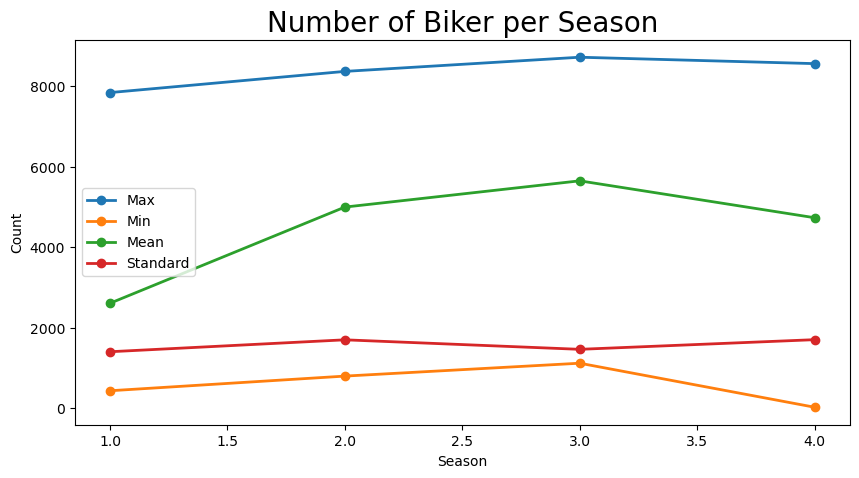

In [27]:
plt.figure(figsize=(10, 5)) 
plt.plot(dayBikeAgg_df["cnt"], marker='o', linewidth=2) 
plt.title("Number of Biker per Season", loc="center", fontsize=20)
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(["Max", "Min", "Mean","Standard"])
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2: 

In [28]:
dayBikeAgg_df = dayBike_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "workingday" : "mean",
    "weathersit" : "mean",
    "temp" : "mean",
    "atemp" : "mean",
    "hum" : "mean",
    "windspeed" : "mean" 
})

In [29]:
dayBikeAgg_df

instant casual                               workingday weathersit  \
       nunique    max  min         mean         std       mean       mean   
season                                                                      
1          181   3155    9   334.928177  387.655561   0.662983   1.408840   
2          184   3410  120  1106.097826  737.590829   0.695652   1.402174   
3          188   3160  118  1202.611702  595.975032   0.696809   1.297872   
4          178   3031    2   729.112360  606.318118   0.679775   1.477528   

            temp     atemp       hum windspeed  
            mean      mean      mean      mean  
season                                          
1       0.297748  0.296914  0.582903  0.214537  
2       0.544405  0.520307  0.626948  0.203507  
3       0.706309  0.655898  0.633482  0.172095  
4       0.422906  0.415539  0.668719  0.171995

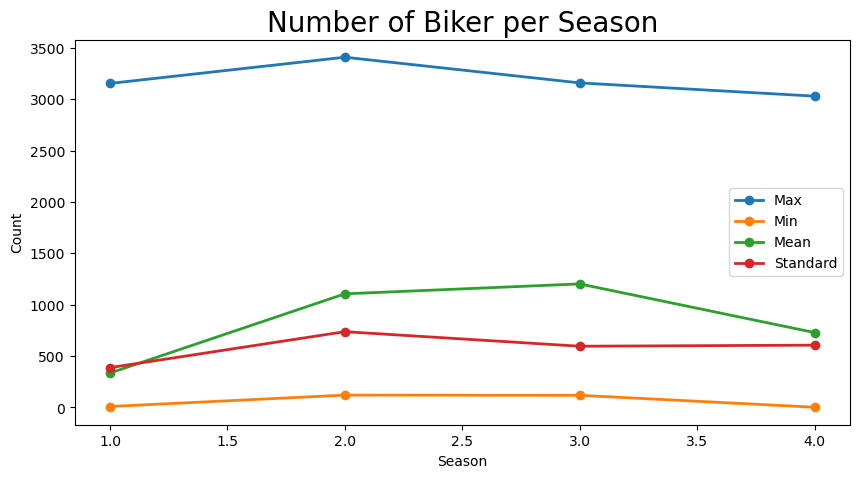

In [30]:
plt.figure(figsize=(10, 5)) 
plt.plot(dayBikeAgg_df["casual"], marker='o', linewidth=2) 
plt.title("Number of Biker per Season", loc="center", fontsize=20)
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(["Max", "Min", "Mean","Standard"])
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

## Conclusion

- Kesimpulan pertanyaan 1 didapat bawasannya agar total semua peseda terbanyak diperlukan faktor situasi cuaca yang bersih dan sedikit berawan, temperatur rata-rata 0.7 atau 29 derajat celcius, rasa temperatur rata-rata 0.65 atau 32 derajat celcius, kelembapan rata-rata 63, dan kecepatan udara 0.17 atau 11. selain itu, bisa dilihat juga bahwa rata-rata pesepeda dapat meluangkan waktu pada hari kerjanya. dengan faktor diatas didapat musim dengan jumlah peserta pesepeda paling banyak yaitu musim gugur.

- Kesimpulan pertanyaan 2 didapat bawasannya agar total semua peseda casual terbanyak diperlukan faktor situasi cuaca yang bersih dan sedikit berawan, temperatur rata-rata 0.5 atau 20 derajat celcius, rasa temperatur rata-rata 0.5 atau 25 derajat celcius, kelembapan rata-rata 63, dan kecepatan udara 0.2 atau 13. selain itu, bisa dilihat juga bahwa rata-rata pesepeda dapat meluangkan waktu pada hari kerjanya. dengan faktor diatas didapat musim dengan jumlah peserta pesepeda casual paling banyak yaitu musim panas.